In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np


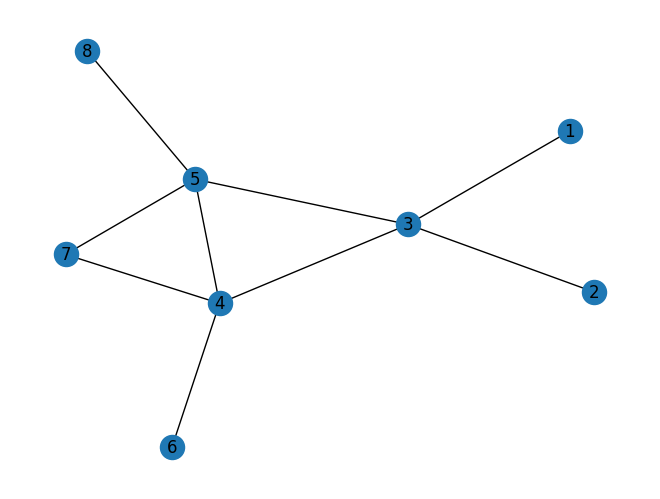

In [8]:
## simple undirected graph
G = nx.Graph()
edge_list = [(1,3), (2, 3), (3, 4), (3, 5), (4,7), (6, 4), (4,5), (5,8), (5,7)]
G = nx.from_edgelist(edge_list)
nx.draw_spring(G, with_labels = True)
plt.show()


In [9]:
## start out with no infectious individuals
nx.set_node_attributes(G, 0, "is_infected")

## start out with no s-i edges (all edges are s-s)
nx.set_edge_attributes(G, 0, "si_edges")

## max number of iterations for the simulation
i_max = 100
## keep track of the times at which events occur
times = []
## keep track of the total number of infected individuals at every time step
no_infected = []

## infection rate
b = 1.1

## recovery rate is = 1


In [10]:
## infect node 3 (INITIAL CONDITIONS)
G.nodes[3]["is_infected"] = 1

## initialize time
T = 0 

## lists to fill as the simulation runs
times = []
no_infected = []
events = []

## start simulation
for i in range(i_max):
  ## check infectious nodes (sum of infected nodes & which nodes are infected)
  total_infectious_nodes = sum(nx.get_node_attributes(G, "is_infected").values())
  infected_nodes = [k for k,v in nx.get_node_attributes(G, "is_infected").items() if v == 1]

  ## update lists for this time step before computing what happens in the next time step
  no_infected.append(total_infectious_nodes)
  times.append(T)

  ## exit simulation if there are no infected individuals
  if total_infectious_nodes == 0:
    print("The simulation has ended. No more infected individuals")
    break

  ## print infected nodes at each time step to make sure that answers seem valid 
  print(f"currently the infected nodes are as follows: {infected_nodes}")

  ## turn edges connected to infected nodes into s-i edges
  for node in infected_nodes:
    new_si_edges = list(G.edges(node))
    for edge in new_si_edges:
      G[edge[0]][edge[1]]["si_edges"] = 1
    total_si_edges = sum(nx.get_edge_attributes(G, "si_edges").values())

  ## calculate the time for the next event
  time_for_next_event = np.random.exponential(scale = (total_si_edges*b + total_infectious_nodes)**(-1), size = 1)[0]
  ## update time
  T += time_for_next_event

  ## calculate probability for recovery
  recovery_prob = total_infectious_nodes / (total_infectious_nodes + b*total_si_edges)
  # calculate spread possibility 
  spread_prob = b*total_si_edges / (total_infectious_nodes + b*total_si_edges)

  ## choose the event that happens next (0 = recovery, 1 = infect)
  event = np.random.choice([0,1], p = [recovery_prob, spread_prob])
  event = 1*(np.random.random() < spread_prob)
  events.append(event)

  # if event is a recovery, randomly heal one node and recover s-i nodes
  if event == 0:
    healed_node = np.random.choice(infected_nodes)
    G.nodes[healed_node]["is_infected"] = 0
    remove_si_edges = list(G.edges(healed_node))
    for element in remove_si_edges:
      G[element[0]][element[1]]["si_edges"] = 0

  ## if event is an infectious one, randomly infect one of the susceptible neighbors 
  if event == 1:
    susceptible_nodes = []
    for node in infected_nodes:
      susceptible_nodes.append(list(G.neighbors(node)))
    susceptible_nodes = [item for sublist in susceptible_nodes for item in sublist]
    node_to_infect = np.random.choice(susceptible_nodes)
    G.nodes[node_to_infect]["is_infected"] = 1


currently the infected nodes are as follows: [3]
currently the infected nodes are as follows: [3, 2]
currently the infected nodes are as follows: [2]
currently the infected nodes are as follows: [3, 2]
currently the infected nodes are as follows: [3, 2, 4]
currently the infected nodes are as follows: [3, 2, 4]
currently the infected nodes are as follows: [3, 2, 4]
currently the infected nodes are as follows: [3, 4]
currently the infected nodes are as follows: [1, 3, 4]
currently the infected nodes are as follows: [1, 3, 4]
currently the infected nodes are as follows: [1, 3]
currently the infected nodes are as follows: [1, 3, 4]
currently the infected nodes are as follows: [3, 4]
currently the infected nodes are as follows: [3, 4, 5]
currently the infected nodes are as follows: [3, 4, 5]
currently the infected nodes are as follows: [3, 4, 5, 7]
currently the infected nodes are as follows: [3, 4, 5, 7, 8]
currently the infected nodes are as follows: [3, 4, 5, 7, 8]
currently the infected

In [11]:
print(f"times at which events occur are as follows: {times}")
print(f"the events that happen are as follows: {events}")
print(f"the number of infected individuals are as follows: {no_infected}")


times at which events occur are as follows: [0, 0.07256268908365839, 0.2449566099429944, 0.42982868155343074, 0.6910961633390063, 0.7226520609479274, 0.784250230135961, 0.9327147061389818, 0.9810992773340642, 0.9931249880964922, 1.1044975370232655, 1.1174354913212687, 1.1501566837354509, 1.2219067805854311, 1.2666415383301368, 1.2747061786819383, 1.486858614531164, 1.5690288126063692, 1.572904097476063, 1.586456961170378, 1.5920914316396004, 1.6594774097106806, 1.703838630586836, 1.7336784001291126, 1.7523949960640877, 1.8301836456856808, 1.8463699503669742, 1.873452808992296, 1.9458978065201973, 1.9465115869579614, 1.9605516029472092, 1.9618352065594435, 2.0033466121541768, 2.2263328669811946, 2.230624095682962, 2.2457686800364987, 2.419469961074481, 2.512401713186103, 2.5495192499177253, 2.5739437507313467, 2.6979897965787454, 2.7500124524508998, 2.9395483406961596, 2.9726811031621128, 3.0102189303424085, 3.025170654004252, 3.0757391606271325, 3.125038757586701, 3.1710562245317826, 3

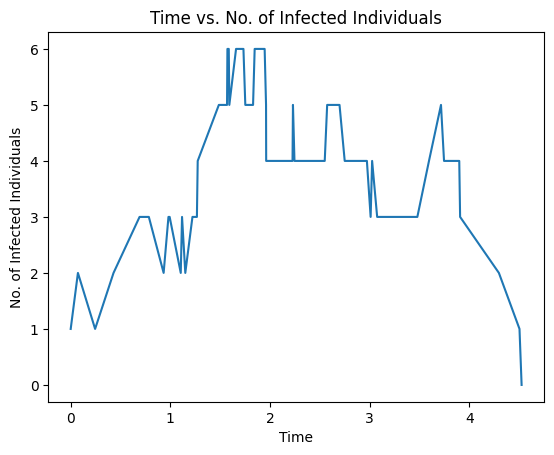

In [12]:
plt.plot(times, no_infected)
plt.title('Time vs. No. of Infected Individuals')
plt.ylabel('No. of Infected Individuals')
plt.xlabel('Time')
plt.show()
